In [10]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://archive.ics.uci.edu/static/public/45/data.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
data.columns

Index(['Age', 'sexe des individus', 'type de douleur thoracique',
       'pression arterielle au repos', 'taux de cholestérol sérique',
       'glycémie à jeun', 'résultats de l'ECG au repos',
       'fréquence cardiaque maximale atteinte', 'angine induite par l'effort',
       'dépression ST induite par l'effort', 'pente du segment ST de l'effort',
       'nombre de vaisseaux colorés par fluoroscopie', 'thalassémie', 'num'],
      dtype='object')

In [6]:
data = data.rename(columns={
    'age': 'Age',
    'sex': 'sexe des individus',
    'cp': 'type de douleur thoracique',
    'trestbps': 'pression arterielle au repos',
    'chol': 'taux de cholestérol sérique',
    'fbs': 'glycémie à jeun',
    'restecg': 'résultats de l\'ECG au repos',
    'thalach': 'fréquence cardiaque maximale atteinte',
    'exang': 'angine induite par l\'effort',
    'oldpeak': 'dépression ST induite par l\'effort',
    'slope': 'pente du segment ST de l\'effort',
    'ca': 'nombre de vaisseaux colorés par fluoroscopie',
    'thal': 'thalassémie',
    'target': 'maladie cardiaque'
})

C:\Users\user\AppData\Local\Temp\ipykernel_5552\2891989945.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.missing_values = data.isnull().sum()


<Axes: >

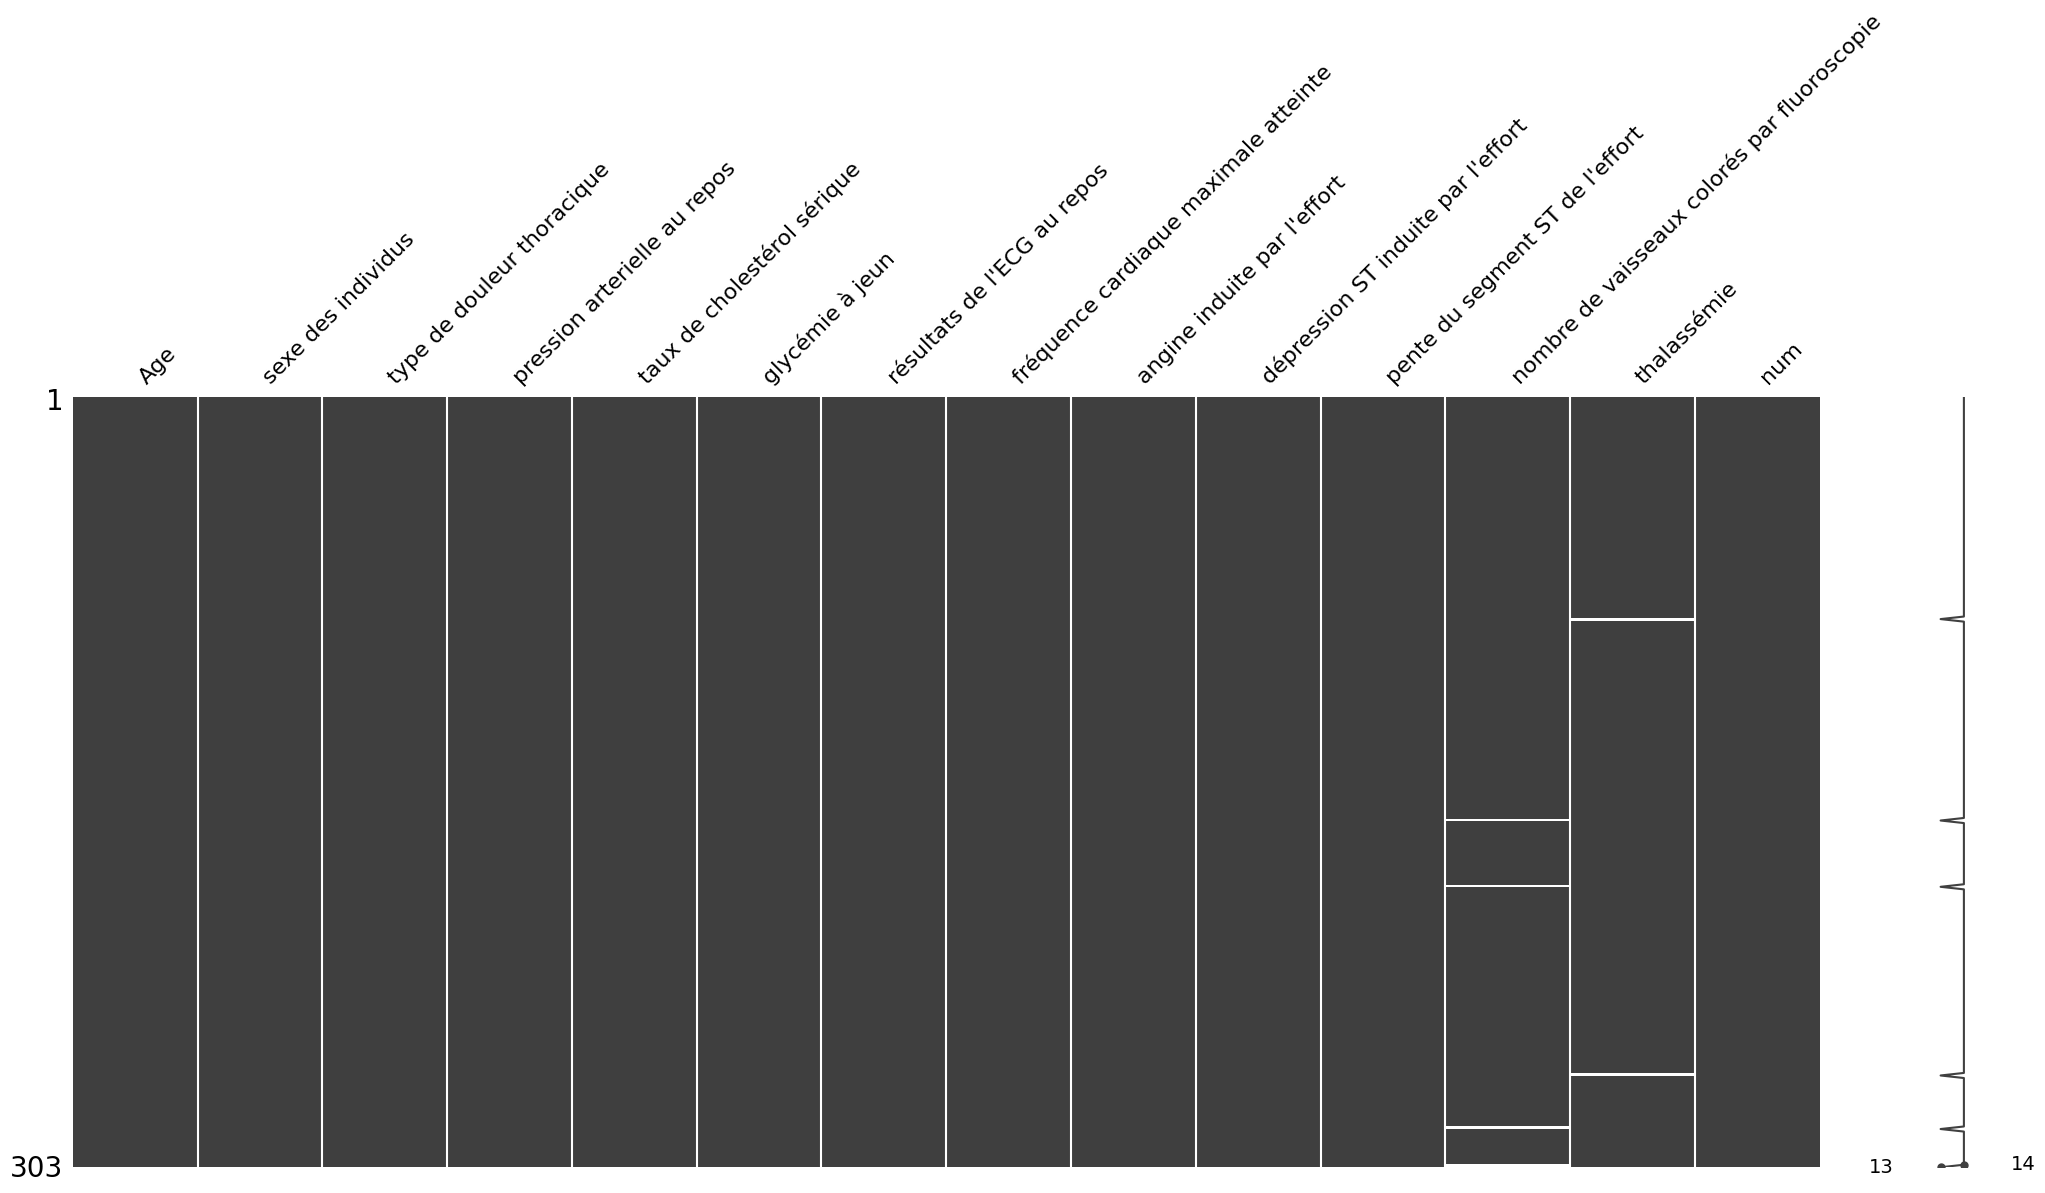

In [8]:
data.missing_values = data.isnull().sum()
msno.matrix(data)

In [9]:
data.duplicated().sum()
data = data.drop_duplicates()

In [11]:
Unique_values = data.nunique()
print("Nombre de valeurs uniques par colonne :")
print(Unique_values)

Nombre de valeurs uniques par colonne :
Age                                              41
sexe des individus                                2
type de douleur thoracique                        4
pression arterielle au repos                     50
taux de cholestérol sérique                     152
glycémie à jeun                                   2
résultats de l'ECG au repos                       3
fréquence cardiaque maximale atteinte            91
angine induite par l'effort                       2
dépression ST induite par l'effort               40
pente du segment ST de l'effort                   3
nombre de vaisseaux colorés par fluoroscopie      4
thalassémie                                       3
num                                               5
dtype: int64


In [13]:
data.describe()
data['Age'] = data['Age'].astype(int)
data['sexe des individus'] = data['sexe des individus'].astype('category')
data['type de douleur thoracique'] = data['type de douleur thoracique'].astype('category')
data['pression arterielle au repos'] = data['pression arterielle au repos'].astype(int)
data['taux de cholestérol sérique'] = data['taux de cholestérol sérique'].astype(int)
data['glycémie à jeun'] = data['glycémie à jeun'].astype('category')
data['résultats de l\'ECG au repos'] = data['résultats de l\'ECG au repos'].astype('category')
data['fréquence cardiaque maximale atteinte'] = data['fréquence cardiaque maximale atteinte'].astype(int)
data['angine induite par l\'effort'] = data['angine induite par l\'effort'].astype('category')
data['dépression ST induite par l\'effort'] = data['dépression ST induite par l\'effort'].astype(float)
data['pente du segment ST de l\'effort'] = data['pente du segment ST de l\'effort'].astype('category')
data['nombre de vaisseaux colorés par fluoroscopie'] = data['nombre de vaisseaux colorés par fluoroscopie'].astype('category')
data['thalassémie'] = data['thalassémie'].astype('category')
data['num'] = data['num'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Age                                           303 non-null    int64   
 1   sexe des individus                            303 non-null    category
 2   type de douleur thoracique                    303 non-null    category
 3   pression arterielle au repos                  303 non-null    int64   
 4   taux de cholestérol sérique                   303 non-null    int64   
 5   glycémie à jeun                               303 non-null    category
 6   résultats de l'ECG au repos                   303 non-null    category
 7   fréquence cardiaque maximale atteinte         303 non-null    int64   
 8   angine induite par l'effort                   303 non-null    category
 9   dépression ST induite par l'effort            303 non-

C:\Users\user\AppData\Local\Temp\ipykernel_5552\112114331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=data, palette='Set2')


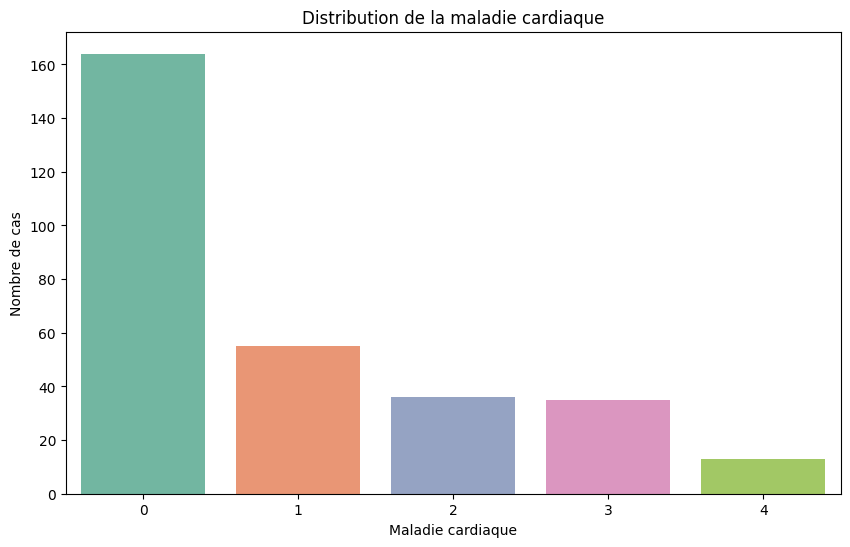

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=data, palette='Set2')
plt.title('Distribution de la maladie cardiaque')
plt.xlabel('Maladie cardiaque')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=0)
plt.show()

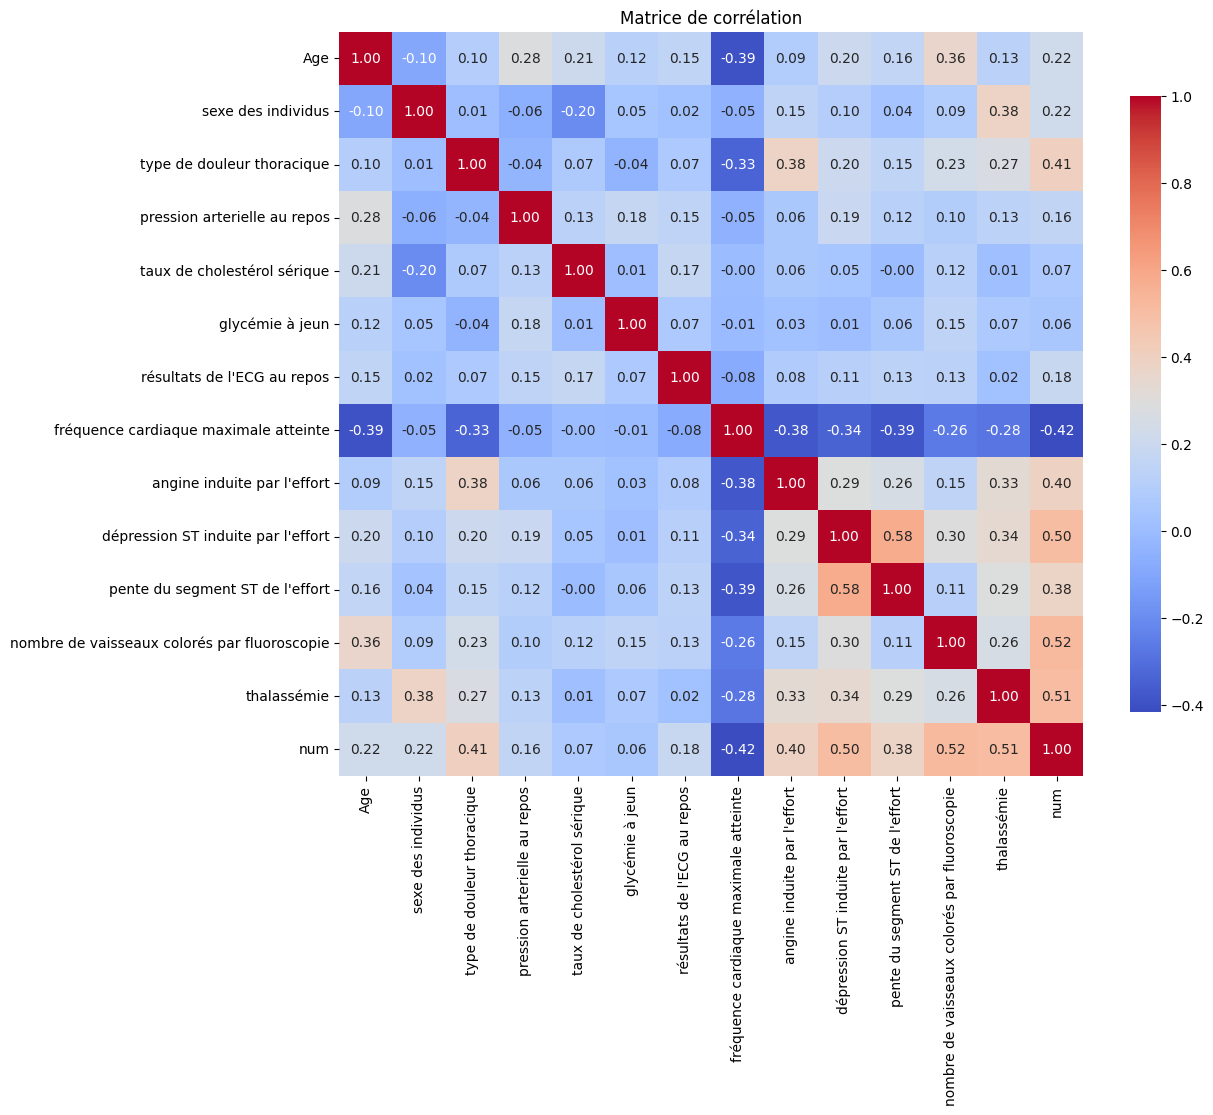

In [17]:
def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 10))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Matrice de corrélation')
    plt.show()
plot_correlation_matrix(data)

Caractéristiques les plus corrélées avec la maladie cardiaque :
["dépression ST induite par l'effort", 'nombre de vaisseaux colorés par fluoroscopie', 'thalassémie', 'num']


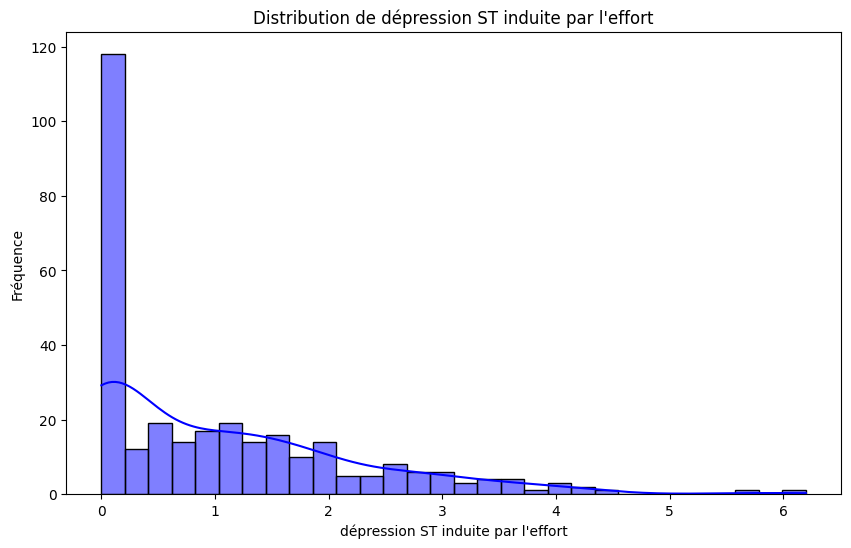

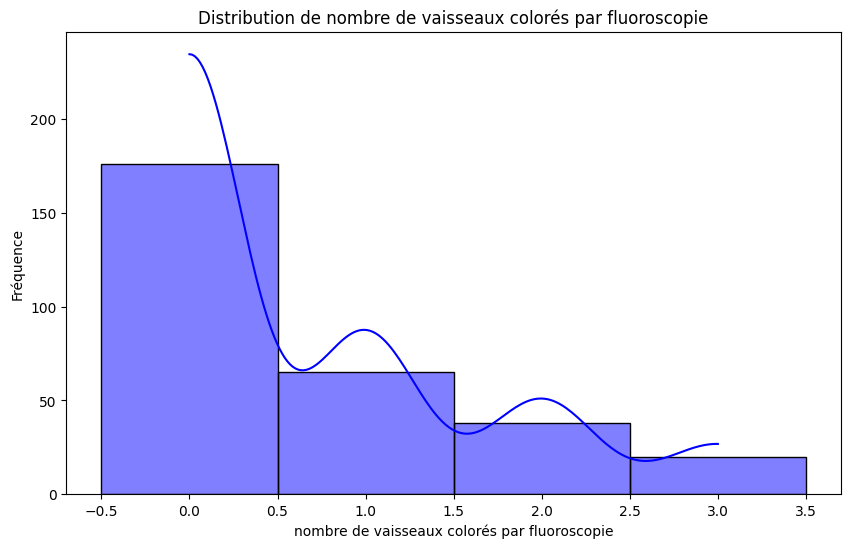

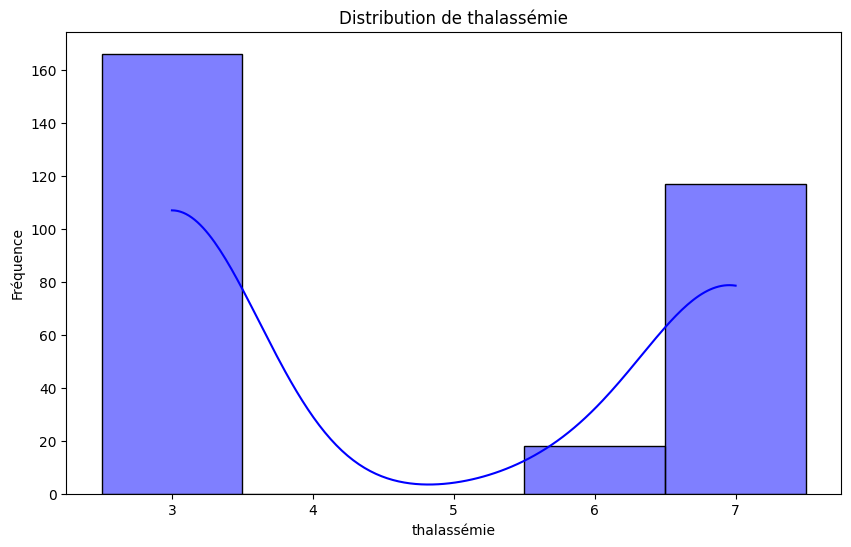

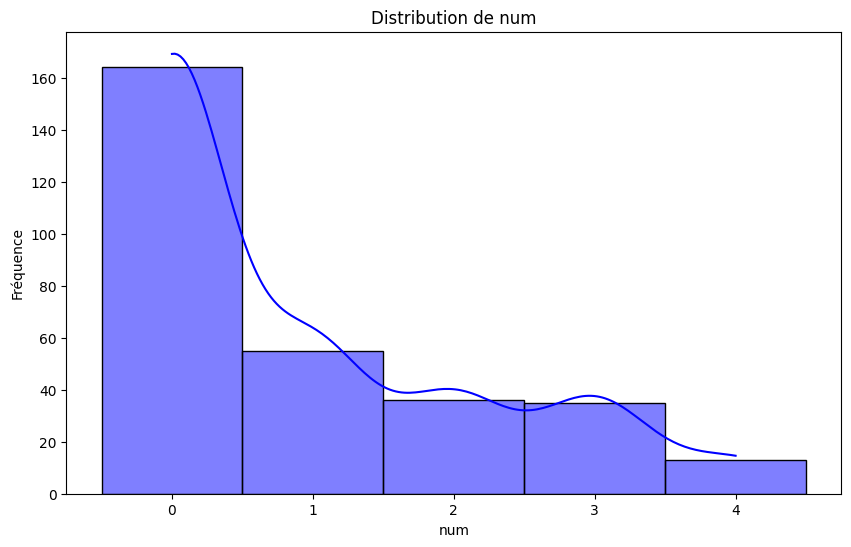

C:\Users\user\AppData\Local\Temp\ipykernel_5552\3304586221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette='Set2')


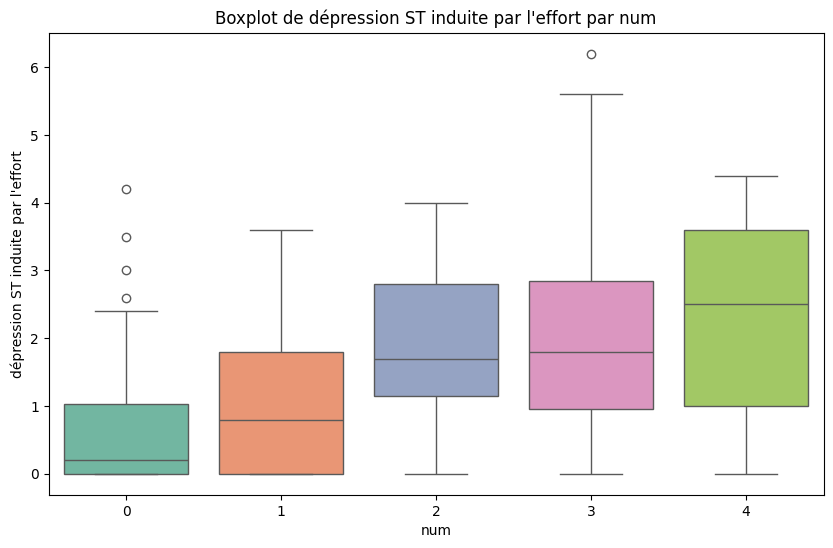

C:\Users\user\AppData\Local\Temp\ipykernel_5552\3304586221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette='Set2')


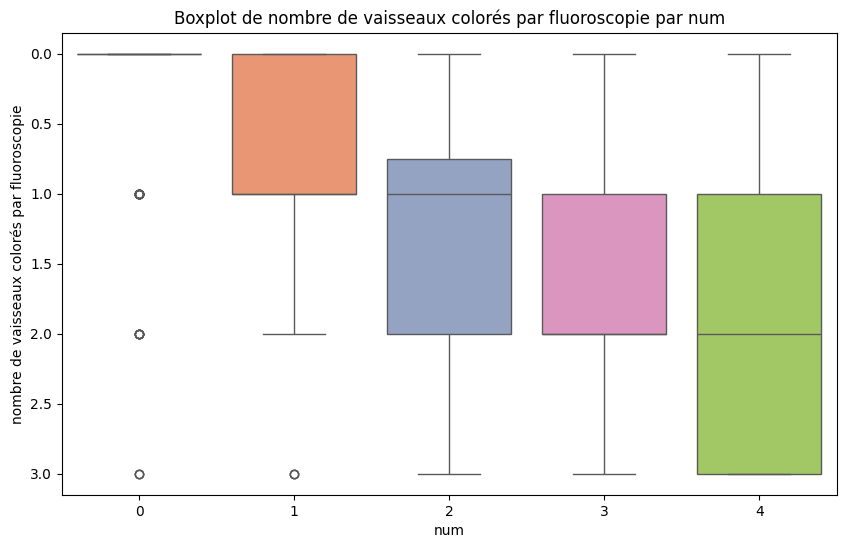

C:\Users\user\AppData\Local\Temp\ipykernel_5552\3304586221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette='Set2')


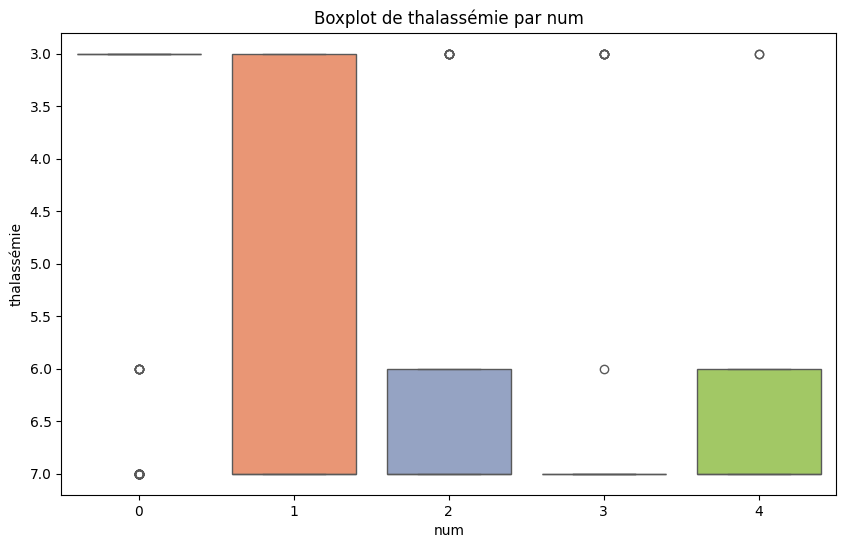

C:\Users\user\AppData\Local\Temp\ipykernel_5552\3304586221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data, palette='Set2')


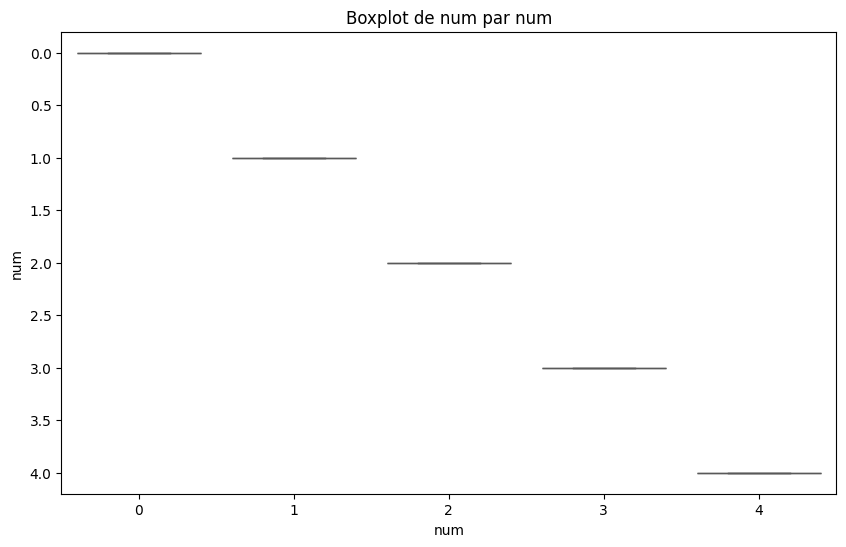

In [18]:
def get_top_correlated_features(data, target, threshold=0.5):
    correlations = data.corr()[target].abs()
    top_features = correlations[correlations > threshold].index.tolist()
    return top_features
top_features = get_top_correlated_features(data, 'num', threshold=0.5)
print("Caractéristiques les plus corrélées avec la maladie cardiaque :")
print(top_features)
def plot_feature_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribution de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fréquence')
    plt.show()
for feature in top_features:
    plot_feature_distribution(data, feature)
def plot_boxplot(data, feature, target):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=data, palette='Set2')
    plt.title(f'Boxplot de {feature} par {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
for feature in top_features:
    plot_boxplot(data, feature, 'num')
def plot_categorical_distribution(data, feature, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue=target, data=data, palette='Set2')
    plt.title(f'Distribution de {feature} par {target}')
    plt.xlabel(feature)
    plt.ylabel('Nombre de cas')
    plt.legend(title=target)
    plt.show()